In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set_theme(style="darkgrid")
from scipy import stats
from scipy.stats import pearsonr
get_median = lambda x:np.median(x)
get_mean = lambda x: np.mean(x)

### Interpreting the main aspects of the data 

**_Extracting the required data set_**

In [2]:
df_housing_prices = pd.read_csv("Housing prices.csv")

In [3]:
pd.set_option("max_columns", None)
df_housing_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**_Displaying Data Types_**

In [4]:
df_housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**_Showing Basics Statistics_**

In [5]:
df_housing_prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_housing_prices.describe(include=object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


* Interpretation:
    - we can observe that the data set is  comprised of float64, int64 and object types. Aside from that, most of the data are incomplete, ranging from 7 entries to 1460 entries per column. The maximum number of rows that have non-missing values in the data set is 1460.


* The following variables are identified as important variables when predicting a house sale price or buying a house:
    - SalePrice
    - OverallCond
    - GrLivArea
    - FullBath
    - BedroomAbvGr
    - YearBuilt
    - PoolArea - Pool area in square feet
    - GarageArea - Size of garage in square feet
    - TotRmsAbvGrd - Total rooms above grade
    - Kitchen - Kitchens above grade
    - KitchenQual - Kitchen quality
    - HeatingQC - Heating quality and condition
    - TotalBsmtSF - Total square feet of basement area
    - Foundation - Type of foundation
    - RoofMatl - Roof material
    - Exterior1st - Exterior covering on house
    - OverallQual - Rates the overall material and finish of the house
    - Utilities - Type of utilities available



###  Selecting any 6 important variables including {SalePrice} and creating a Seaborn pairplot.

- *The selected variables except the SalePrice variable are:*
    - OverallCond - Rates the overall condition of the house
    - GrLivArea -  Above grade (ground) living area square feet
    - FullBath -  Full bathrooms above grade
    - BedroomAbvGr - Bedrooms above grade
    - YearBuilt - Original construction date

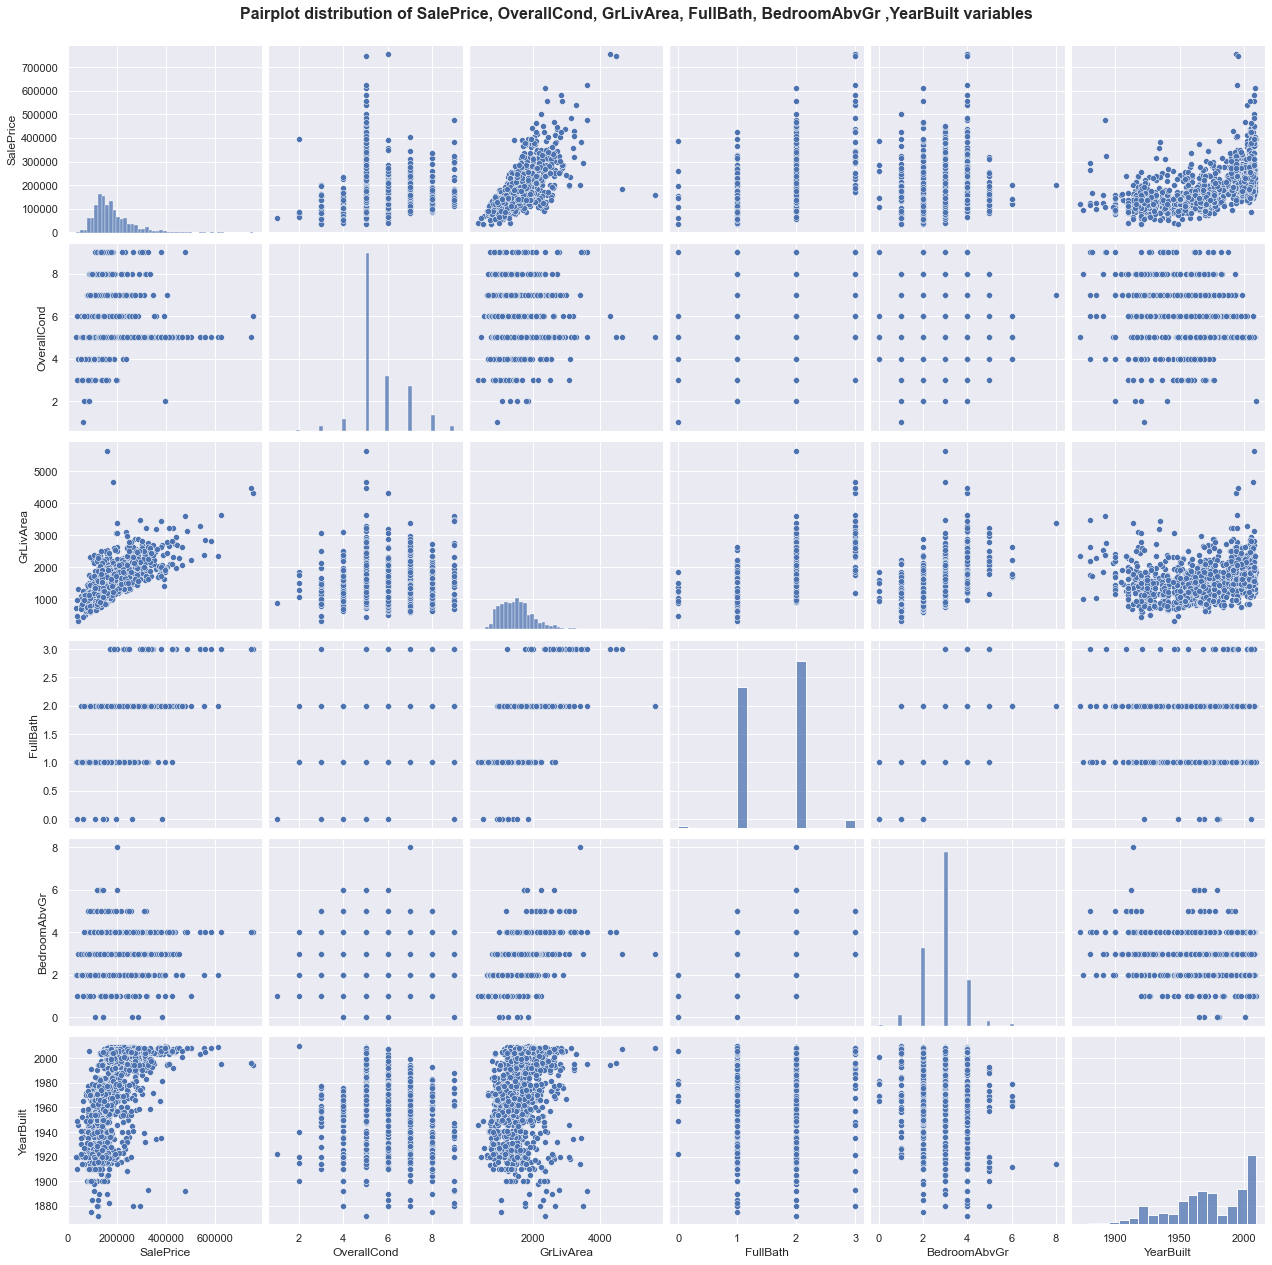

In [7]:
pair= sns.pairplot(df_housing_prices, vars=['SalePrice', 'OverallCond', 'GrLivArea', 'FullBath', 'BedroomAbvGr' ,'YearBuilt'],
             height =3, palette="Set2")

#move overall title up
pair.fig.subplots_adjust(top=0.95)

#add overall title
pair.fig.suptitle("Pairplot distribution of SalePrice, OverallCond, GrLivArea, FullBath, BedroomAbvGr ,YearBuilt variables",
                 fontweight="bold",fontsize= 16);

- Interpretation:
    - The above pair plot represents the relationship between 'SalePrice', 'OverallCond', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'YearBuilt' variables. We can observe that the SalePrice and the YearBuilt variables are positively correlated, showing that the house sale price decreases with the increasing age of the house. The SalePrice and the GrLivArea variables are positively correlated, showing that the house sale price increases with the increasing living area square feet. The YearBuilt and the GrLivArea variables are also positively correlated, showing that the recently built houses have more living area square feet. 
    
    - By observing diagonal histograms, we can learn that the SalePrice and GrLivArea variables are heavily right-skewed while variables OverallCond and FullBath are slightly skewed to the right. The BedroomAbvGr variable seems to has a near symmetric distribution and, the YearBuilt variable shows a rapid Positive increment.



### Creating a simple chart to identify the overall distribution of price variable.

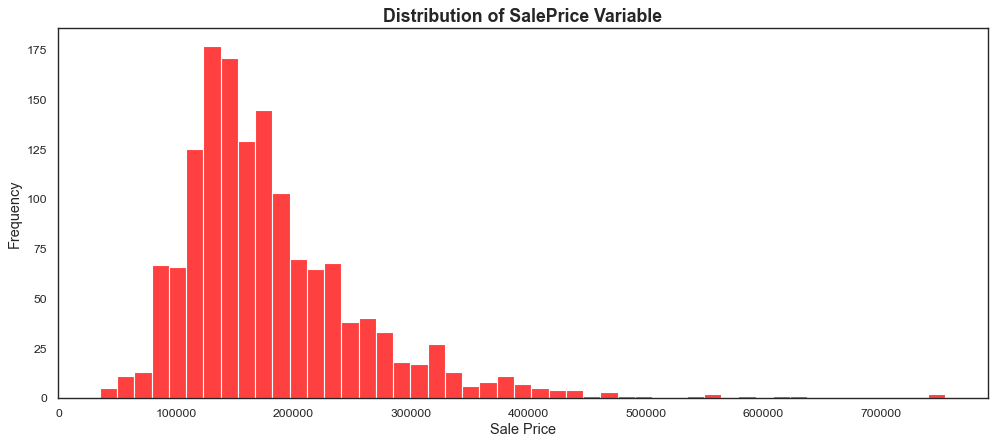

In [8]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
plt.figure(figsize=(15, 6), dpi=80)

sns.histplot(x=df_housing_prices.SalePrice, color='red')

plt.title('Distribution of SalePrice Variable',fontweight="bold",fontsize= 16)
plt.xlabel('Sale Price',fontsize=13)
plt.ylabel('Frequency', fontsize=13);

* Interpretation:

    - The above plot, which shows the distribution of house sale price, is skewed to the right or positively skewed. In this sale price distribution the mode locates closer to the left of the graph and smaller than either the mean or the median of the distribution. The mean of the distribution will be located to the right side of the graph and will be a greater value than either the median or the mode. It indicates that there are a number of data points, perhaps outliers, that are greater than the mode. Most of the house sales were between the sale price range of 100000 - 300000. A few house sales were between the sale price range of 300000 - 500000, and a handful was a sale price of 500000 or above. The distribution of house sale prices of 300000 or above is what makes the data have a shape that is skewed right. Otherwise, the histogram would be reasonably symmetric. 

### Identifying the distribution of price with respect to different Types of foundation inside a single chart figure 

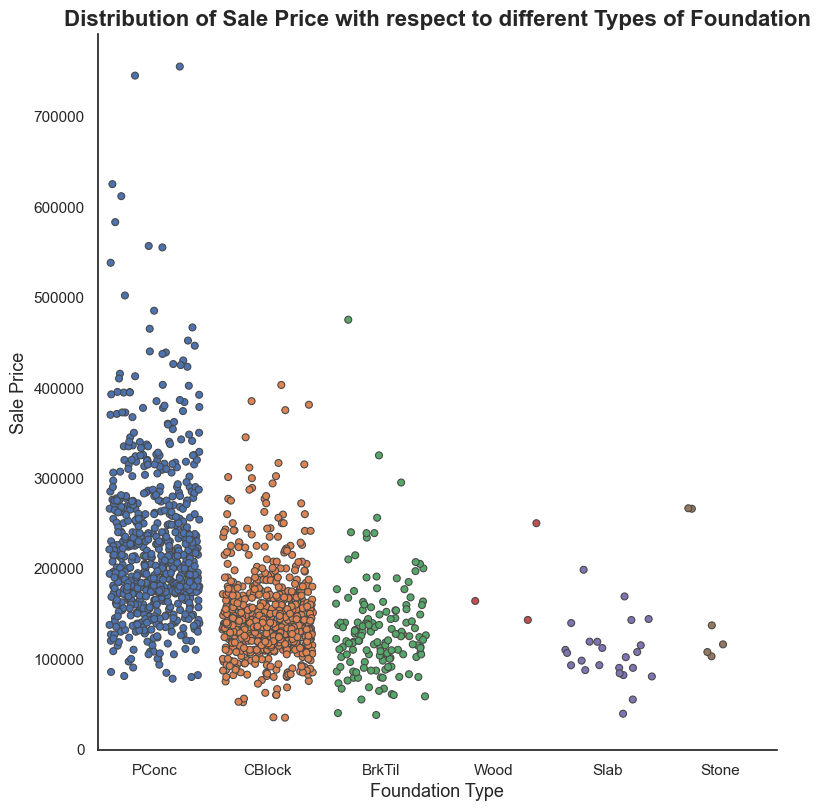

In [9]:
sns.catplot(x="Foundation", y="SalePrice", kind='strip', jitter=0.4, data=df_housing_prices, height=8, linewidth=0.8)

plt.title('Distribution of Sale Price with respect to different Types of Foundation', fontweight="bold", fontsize= 16)
plt.xlabel('Foundation Type', fontsize= 13)
plt.ylabel('Sale Price', fontsize= 13);

* Interpretation:
    - The above plot represents the distribution of house sale prices with the type of foundation. The majority of house sales are of PConc(Poured Concrete), CBlock(Cinder Block), BrkTill(Brick & Tile) foundation types, and a very few house sales are of Wood, Slab, Stone foundation types. PConc foundation-type houses seem to have more value towards the top sale price range and have some sales over 500000 sale price. The majority of house sales are in the sale price range of 100000 - 300000 irrespective of the type of the foundation. CBlock and BrkTill foundation types show a handful of sales above 300000 sale price. Apart from Wood foundation type, houses with other foundation types show significant amount sales below 100000 sale price.

### Creating a facet grid to identify the distribution of price with respect to alley access and condition of the material on the exterior.

In [10]:
import warnings
warnings.filterwarnings("ignore")

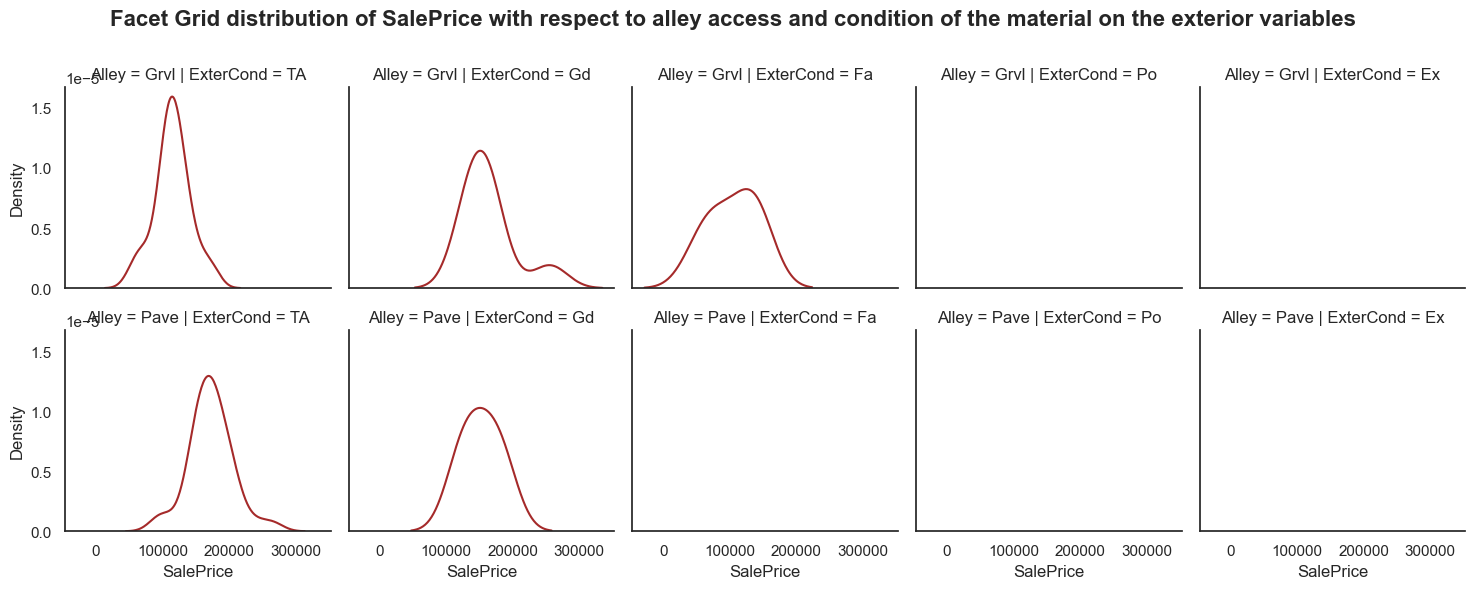

In [11]:
g = sns.FacetGrid(df_housing_prices, row="Alley", col="ExterCond", height =3)
g.map(sns.kdeplot, "SalePrice", color= 'brown')

#move overall title up
g.fig.subplots_adjust(top=0.85)

#add overall title
g.fig.suptitle("Facet Grid distribution of SalePrice with respect to alley access and condition of the material on the exterior variables", fontweight="bold",fontsize= 16);

**_Analyzing the variables individually_**

In [12]:
df_housing_prices['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [13]:
df_housing_prices['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

* Interpretation:
    - The above facet grid represents the distribution of SalePrice with respect to alley access and condition of the material on the exterior variables using Kernel Density Estimation (KDE) plots. The distribution curve of Grvl alley access is right-skewed which means the mean is greater than the median of the distribution. The distribution curve of Pave alley access is slightly left-skewed which means the mean is less than the median of the distribution. The curve of TA exterior condition is a unimodal distribution which is slightly right-skewed because of its data distribution beyond the 400000 sale price range. Otherwise, it could be a symmetric distribution. The curve of Gd (Good) exterior condition is also a unimodal distribution with the peak of the curve near 200000 sale price because that’s where the most values are located. Because of the very small frequencies, Po (Poor) and Ex (Excellent) exterior condition, distributions are considered to be negligible. 

### Creating a simple chart to identify the median Sale price for each year.

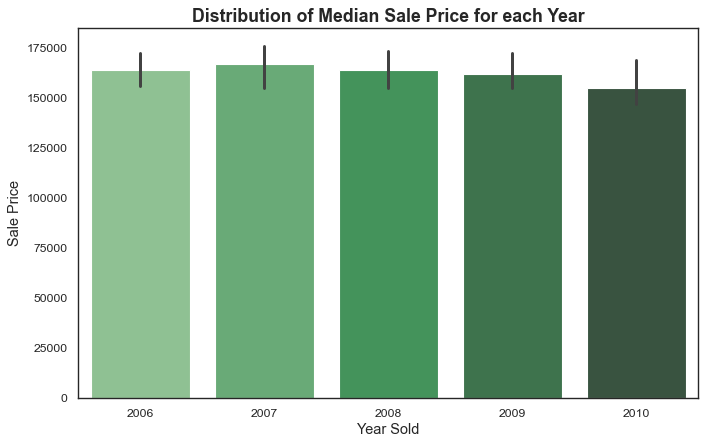

In [14]:
plt.figure(figsize=(10, 6), dpi=80)
sns.barplot(x='YrSold', y='SalePrice', data=df_housing_prices,  estimator=get_median, palette="Greens_d")

plt.title('Distribution of Median Sale Price for each Year', fontweight="bold", fontsize= 16)
plt.xlabel('Year Sold', fontsize= 13)
plt.ylabel('Sale Price', fontsize= 13);

* Interpretation:
    - The above bar chart compares the median house sale price for each year from 2006 to 2010. The year 2007 seems to have the highest median sale price while 2010 has the lowest. 2006 and 2008 seem to have an equal median sale price according to the above graph. The median sale price of every year is above the 150000 sale price range. Since 2007 the median sale price seems to have decreased gradually.   

### Checking the relationship between price and living area square feet.

Slope: 107.13035896582518 
Intercept: 18569.02585648725 
R squared: 0.5021486502718041 
Pearsons Correlation: 0.709 
Std_error: 2.7936210388899063 
RMSE: 1.671412887018018


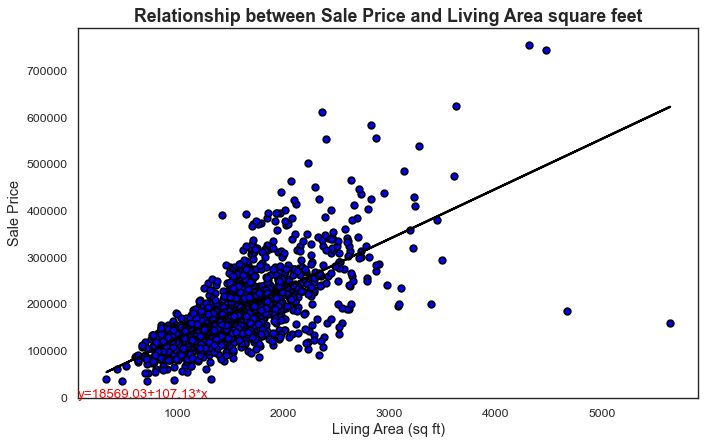

In [15]:
x= df_housing_prices.GrLivArea
y= df_housing_prices.SalePrice

plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x,y, color="blue", edgecolor='black', linewidth=1.5)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# the polynomial coefficients
reg1_fit = np.polyfit(df_housing_prices.GrLivArea, df_housing_prices.SalePrice, 1)

# regression lines
plt.plot(df_housing_prices.GrLivArea, reg1_fit[0]* df_housing_prices.GrLivArea + reg1_fit[1], color='black', linewidth=2)  

#regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(reg1_fit[1], reg1_fit[0]), color='red', size=12)

plt.title('Relationship between Sale Price and Living Area square feet', fontweight="bold", fontsize= 16)
plt.xlabel('Living Area (sq ft)', fontsize= 13)
plt.ylabel('Sale Price', fontsize= 13);

# pearson correlation value
corr,_ = pearsonr(x,y)

print("Slope:", slope,
      "\nIntercept:", intercept,
      "\nR squared:", r_value**2,
      "\nPearsons Correlation: %.3f" % corr,
      "\nStd_error:", std_err,
      "\nRMSE:", np.sqrt(std_err));
      

* Interpretation:

    - The slope of the graph is positive and it shows a _positive Pearson's Correlation value_ which means both variables change in the same direction.
    - _Pearsons Correlation coefficient_ is used in statistics to measure how strong a relationship is between two variables. Here it shows a _0.709_ which is generally _considered strong_ when their r value is larger than 0.7.
    - The correlation becomes weaker as the data points become more scattered and it is affected by outliers. The outliers in the above plot greatly reduce the correlation.
    - R-squared (coefficient of determination) is a statistical measure of how close the data are to the fitted regression line. The above plot represents a _R-squared value of 0.5021486502718042 (50.21%)_ which is generally considered as a _moderate effect_ size.
    - The standard error helps to estimate how well the sample data represents the whole population. A low standard error shows that sample means are closely distributed around the population mean and the sample is representative of the population. This plot shows a _standard error of 2.7936210388899068._
    - Root Mean Square Error(RMSE) is a metric that tells the average distance between the predicted values from the model and the actual values in the dataset. The lower the RMSE, the better a given model can “fit” a dataset. This plot shows a _RMSE value of 1.6714128870180183._

### Checking the Relationship between price and square feet of basement area.

Slope: 111.10960368712757 
Intercept: 63430.628545506275 
R squared: 0.3764810932516862 
Pearsons Correlation: 0.614 
Std_error: 3.7447778950392516 
RMSE: 1.9351428616614463


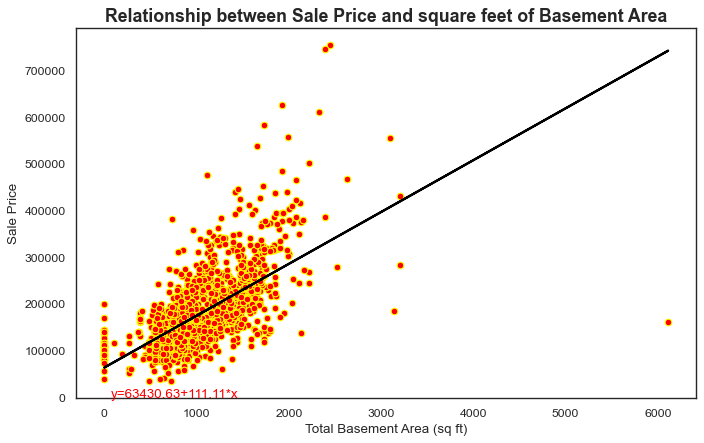

In [16]:
x= df_housing_prices.TotalBsmtSF
y= df_housing_prices.SalePrice

plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x,y, color="red", edgecolor='yellow', linewidth=1)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# the polynomial coefficients
reg1_fit = np.polyfit(df_housing_prices.TotalBsmtSF, df_housing_prices.SalePrice, 1)

# regression lines
plt.plot(df_housing_prices.TotalBsmtSF, reg1_fit[0]* df_housing_prices.TotalBsmtSF + reg1_fit[1], color='black', linewidth=2)  

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(reg1_fit[1], reg1_fit[0]), color='red'   , size=12)

plt.title('Relationship between Sale Price and square feet of Basement Area', fontweight="bold", fontsize= 16)
plt.xlabel('Total Basement Area (sq ft)', fontsize= 12)
plt.ylabel('Sale Price', fontsize= 12);

# pearson correlation value
corr,_ = pearsonr(x,y)

print("Slope:", slope,
      "\nIntercept:", intercept,
      "\nR squared:", r_value**2,
      "\nPearsons Correlation: %.3f" % corr,
      "\nStd_error:", std_err,
      "\nRMSE:", np.sqrt(std_err));
     

* Interpretation:

    - The slope of the graph is positive and has a higher gradient and intercept value than the plot in 5(a).
    - The **Pearson's Correlation coefficient** of the plot is _0.614_ which is generally _considered moderate_ and it is **less** than that of in 5(a) plot (0.709).
    - As in the 5(a) plot, the outliers in the above plot greatly reduces the correlation between the variables.
    - The above plot represents a **lower R-squared value** than the 5(a) plot (0.5021486502718042) of _0.3764810932516862_ (37.64%) which is generally considered as a low effect size.
    - The above plot represents a **higher Standard error value** of _3.744777895039252_ than the 5(a) plot (2.7936210388899068). 
    - The above plot represents a **higher RMSE value** of _1.9351428616614466_ than the 5 (a) plot (1.6714128870180183).

Therefore, *_the varriable **'GrLivArea'** has a higher relationship with Sale price._*

* In the above plot we can observe **the problem of overplotting** with most of the points overlapping on each other. So it is hard to read in this current format. Because of the number of points, it is hard to compare areas of high concentration. 

### Visualizing all the points of Sales price with respect to rating of basement.

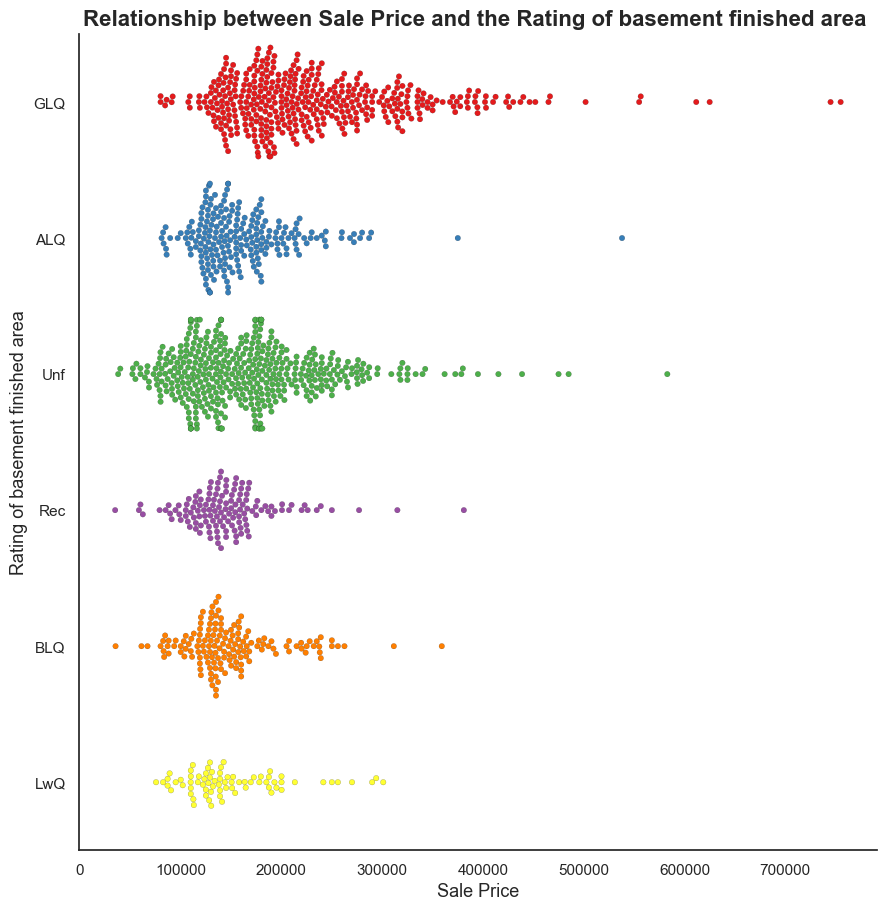

In [18]:
sns.catplot(x= "SalePrice", y= "BsmtFinType1",kind = 'swarm' , data=df_housing_prices, s=4, height=9, aspect=1,
            palette="Set1", linewidth=0.1, edgecolor="black")

plt.title('Relationship between Sale Price and the Rating of basement finished area ', fontweight="bold", fontsize= 16)
plt.xlabel('Sale Price', fontsize= 13)
plt.ylabel('Rating of basement finished area', fontsize= 13);


* Interpretation:

    - The above plot represents the distribution of sale price with the rating of the basement finished area in the house.
we can say that there are a few house sales with 'LwQ' (Low Quality) rated basement finished area and there are a greater number of house sales' basement finished area rated with 'Unf'(Unfinished) and 'GLQ'(Good Living Quarters). 
There a quite a few house sales with 'ALQ' (Average Living Quarters) rated basement finished area as well. 
Many house sales are dominating the low price range (10000 - 200000) irrespective of the rating of basement finished area. 
‘GLQ’ rated basement finished area houses seem to have more values towards the top sale price range while 'Unf', 'Rec'(Average Rec Room), and 'BLQ'(Below Average Living Quarters) seem to have more values towards the lower sale price range (below 100000).

### Plotting the Boxplot distribution

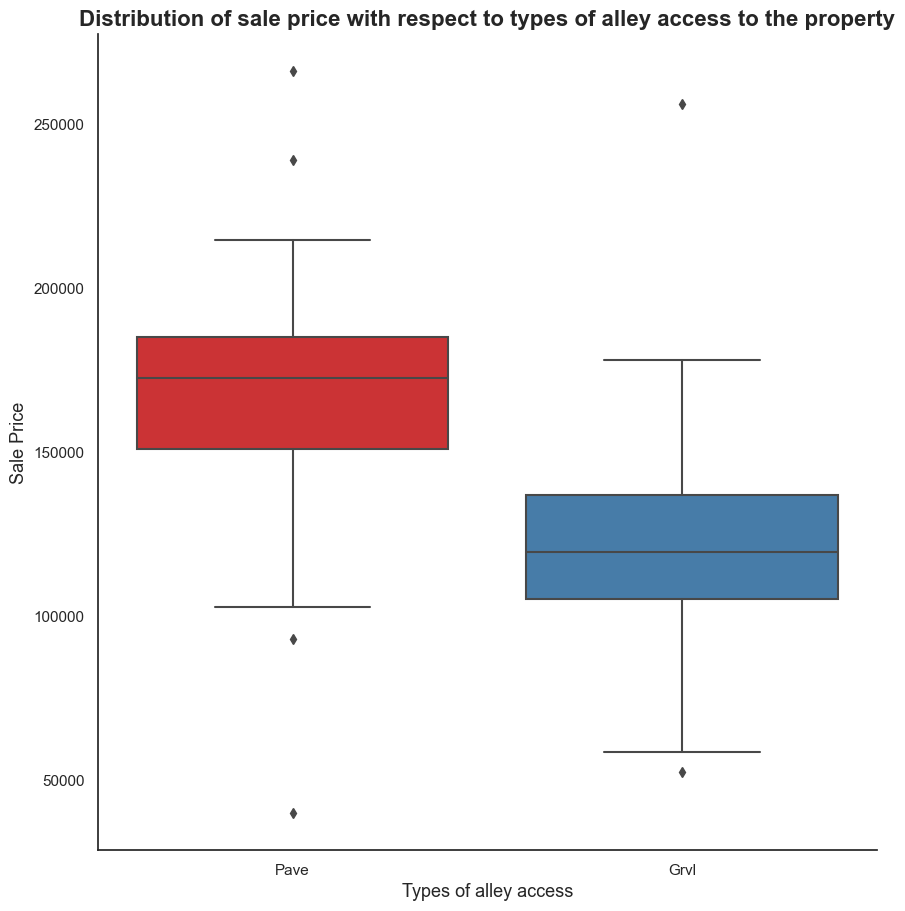

In [19]:
sns.catplot(x="Alley", y="SalePrice", kind="box", data=df_housing_prices, height=9, order=["Pave", "Grvl"], aspect=1,
           palette="Set1")

plt.title('Distribution of sale price with respect to types of alley access to the property', fontweight="bold", fontsize= 16)
plt.xlabel('Types of alley access', fontsize= 13)
plt.ylabel('Sale Price', fontsize= 13);

* Interpretation:
    - Using the above graph, we can compare the range and distribution of sale price with Pave (Paved) and Grvl (Gravel) alley access types. It shows that the median sale price of houses with Pave alley access is greater than that of Grvl alley access. The boxplot for Pave alley access shows some slight left-skew (negatively skewed) because the lower whisker is longer than the upper one. The main body of data for the Grvl alley access looks symmetric, but there is an outlier on either side of each upper and lower whisker which would undoubtedly affect any calculations of skewness. The interquartile ranges are reasonably similar because the lengths of the boxes are look similar. The overall range of the data set is greater for the Pave alley access distribution with the outliers on either side of both upper and lower whiskers.

### Plotting the Violin Plot distribution

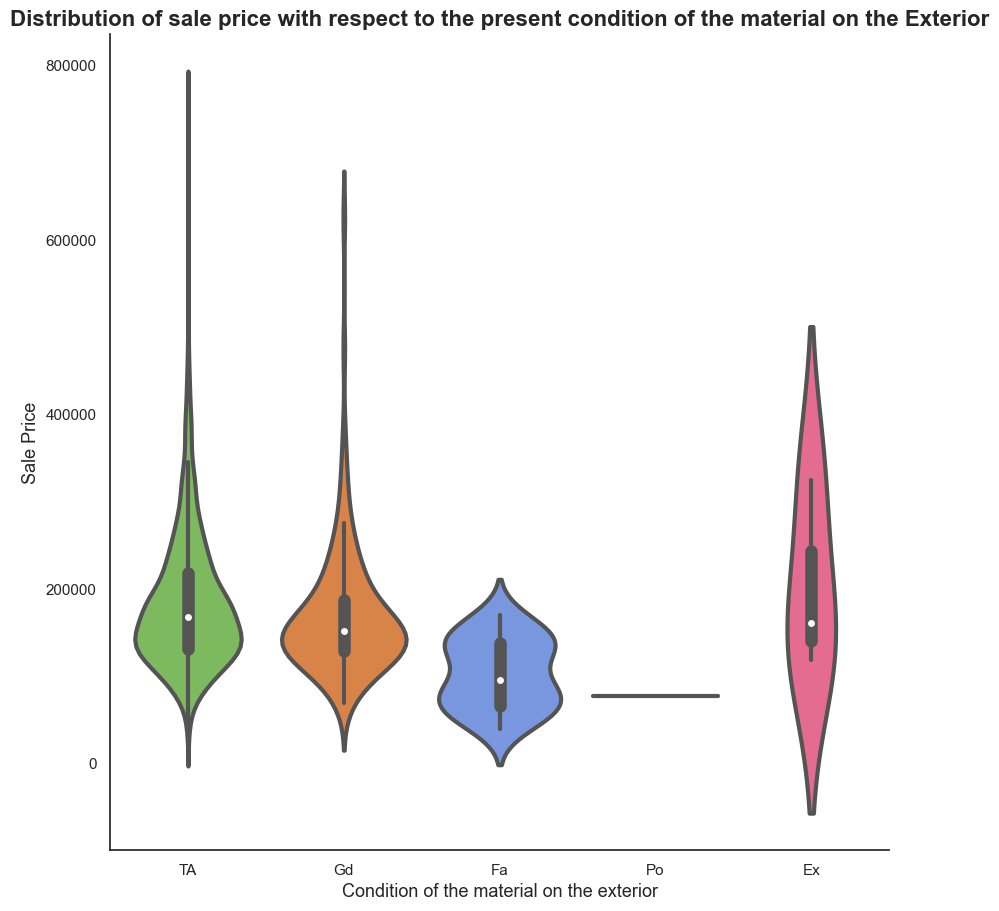

In [20]:
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888']
sns.catplot(x="ExterCond", y="SalePrice", kind="violin", data=df_housing_prices, height=9, aspect=1, palette=colors,
            inner="box", cut=2, linewidth=3)

plt.title('Distribution of sale price with respect to the present condition of the material on the Exterior', fontweight="bold", fontsize= 16)
plt.xlabel('Condition of the material on the exterior', fontsize= 13)
plt.ylabel('Sale Price', fontsize= 13);

* Interpretation:

    - The above violin plot shows the relationship of the sale price with respect to the present condition of the material on the Exterior of the house. The box plot elements show the median price of Fa (Fair) condition is the lowest while TA (Average/Typical) and Ex (Excellent) conditions seem to have a similar median price for the highest in the distribution. The skinny shape of the Ex distribution indicates that the sale prices are slightly concentrated around the median. TA and Gd (Good) distributions are considerably wider around the median which means the sale prices are highly concentrated around the corresponding medians. Fa distribution is highly concentrated around the first and second quartile regions. We can observe that TA and Gd distributions have a very high number of outliers while Fa distribution is having the least. Ex distribution has a lower number of outliers compared to TA and Gd distributions.



### Creating a simple chart to identify the average Sale price distribution with respect to month they sell.

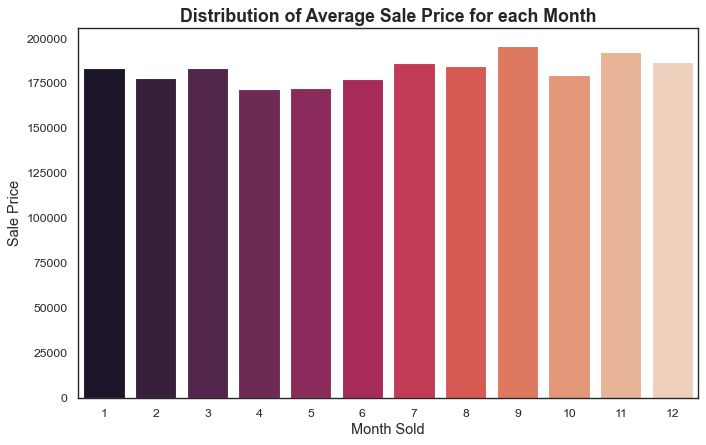

In [21]:
plt.figure(figsize=(10, 6), dpi=80)
sns.barplot(x='MoSold', y='SalePrice', data=df_housing_prices,  estimator=get_mean, palette="rocket", ci=None)

plt.title('Distribution of Average Sale Price for each Month', fontweight="bold", fontsize= 16)
plt.xlabel('Month Sold', fontsize= 13)
plt.ylabel('Sale Price', fontsize= 13);

* Interpretation:
    - This particular bar graph shows the average house sale price for each month. It appears that the month of April (4) has the least average house sale price while the month of September (9) has the highest. We can observe a progressive positive increment of the average sale price from April to July (7). The above plot represents an increasing and decreasing trend of average sale price starting from month January (1) to month May (5). It shows the same increasing and decreasing trend of the average sale price from the month of  June (6) to the month of January. It seems that month January and month March has somewhat similar average sale price while the average sale prices of months of June and February seemingly similar to each other.



---